In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skit
import seaborn as sns
from IPython.display import display, Markdown, Latex

In [28]:
def do_plot(sizeX, sizeY, index, data, xLabel, yLabel, legend, file, yTicks = 30, dataDiv = 1, log = False):
    data = data / dataDiv
    fig, ax = plt.subplots(figsize=(sizeX,sizeY))
    if log:
        ax.set_yscale('log', basey=2)
    if index is None:
        ax.plot(data ,  marker='.',linewidth=0.0,  markersize=40)
    else:
        ax.plot(index, data ,  marker='.',linewidth=0.0,  markersize=60)
        ax.set_xticks(index)
    yTick = []
    last = None
    tick = data.values.reshape((data.values.size))
    tick.sort()
    minSize = tick[-1] / yTicks
    for i in tick:
        if last is None:
            yTick.append(i)
            last = i
            continue
        if i - last > minSize:
            yTick.append(i)
            last = i
    ax.set_yticks(yTick)
    ax.legend(legend, fontsize = 50)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel(xLabel, size = 35)
    plt.ylabel(yLabel, size = 35)
    plt.grid()
    fig.savefig(file, bbox_inches='tight')

In [29]:
def do_box_plot(x, y, data, xLabel, yLabel, file):
    fig, ax = plt.subplots(figsize=(30, 15))
    # setting log axis
    
    ax = sns.boxplot(x=x, y=y, data=RAW_DATA)
    ax.set_yscale('log', basey=2)
    ax.set_xlabel(xLabel) 
    ax.set_ylabel(yLabel)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel(xLabel, size = 35)
    plt.ylabel(yLabel, size = 35)
    fig.savefig(file, bbox_inches='tight')

In [46]:
RAW_DATA = pd.read_csv('results/mut1/t_data.csv').reset_index(drop=True)
RAW_DATA1 = pd.read_csv('results/mut2/t_data.csv').reset_index(drop=True)

time_var = RAW_DATA1.groupby(['n_var']).mean()['time']
time_clause1 = RAW_DATA.groupby(['n_clause']).mean()['time']
time_clause2 = RAW_DATA1.groupby(['n_clause']).mean()['time']
display

"""timeMean = RAW_DATA.groupby(['t_size']).mean()['satisfied']
display(timeMean.plot())
timeMean = RAW_DATA.groupby(['t_size']).mean()['score']
display(timeMean.plot())
timeMean = RAW_DATA1.groupby(['t_size']).mean()['satisfied']
display(timeMean.plot())
timeMean = RAW_DATA1.groupby(['t_size']).mean()['score']
display(timeMean.plot())"""
#timeMean = RAW_DATA.groupby(['n']).mean()[timeB]
#timeMedian = RAW_DATA.groupby(['n']).median()[timeB]
#errorMean =  RAW_DATA.groupby(['n']).mean()[errB]
#errorMax = RAW_DATA.groupby(['n']).max()[errB]
RAW_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 12 columns):
id           660 non-null int64
gen_size     660 non-null int64
gen_count    660 non-null int64
mut          660 non-null float64
cross        660 non-null float64
elitism      660 non-null int64
t_size       660 non-null float64
time         660 non-null float64
score        660 non-null float64
satisfied    660 non-null float64
n_var        660 non-null int64
n_clause     660 non-null int64
dtypes: float64(6), int64(6)
memory usage: 62.0 KB


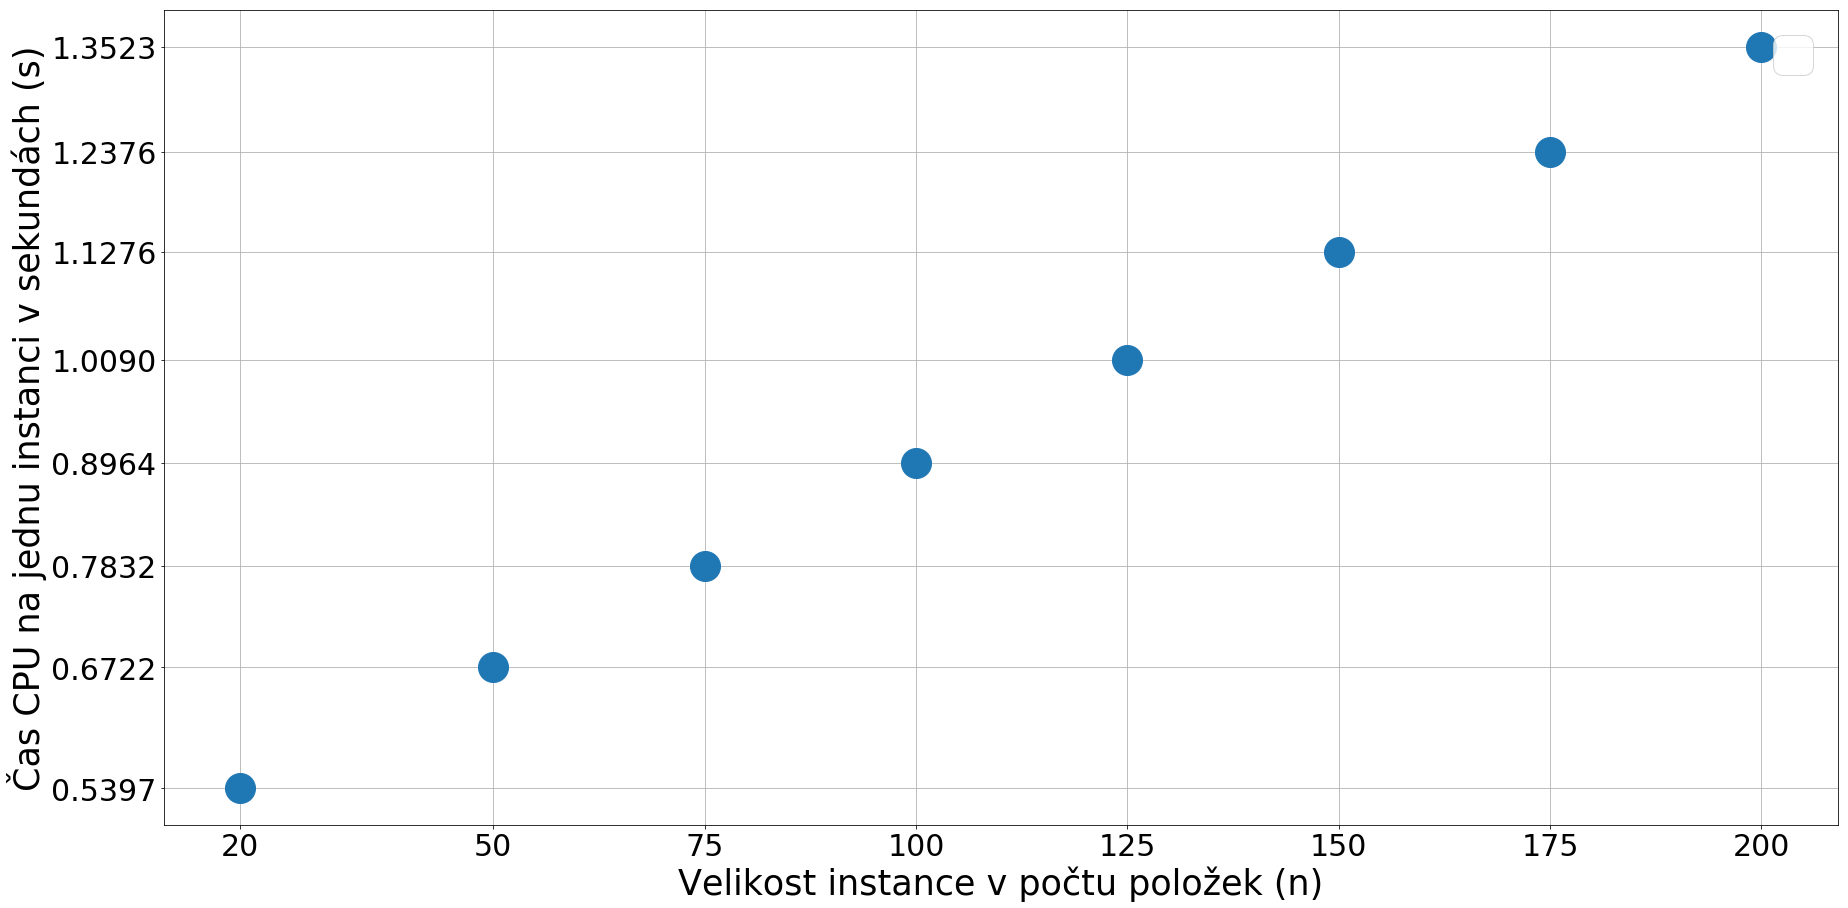

In [49]:
do_plot(30, 15, time_var.index, time_var, 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (ms)", 
        [], "FPTAS1avg.pdf", 30, 1)

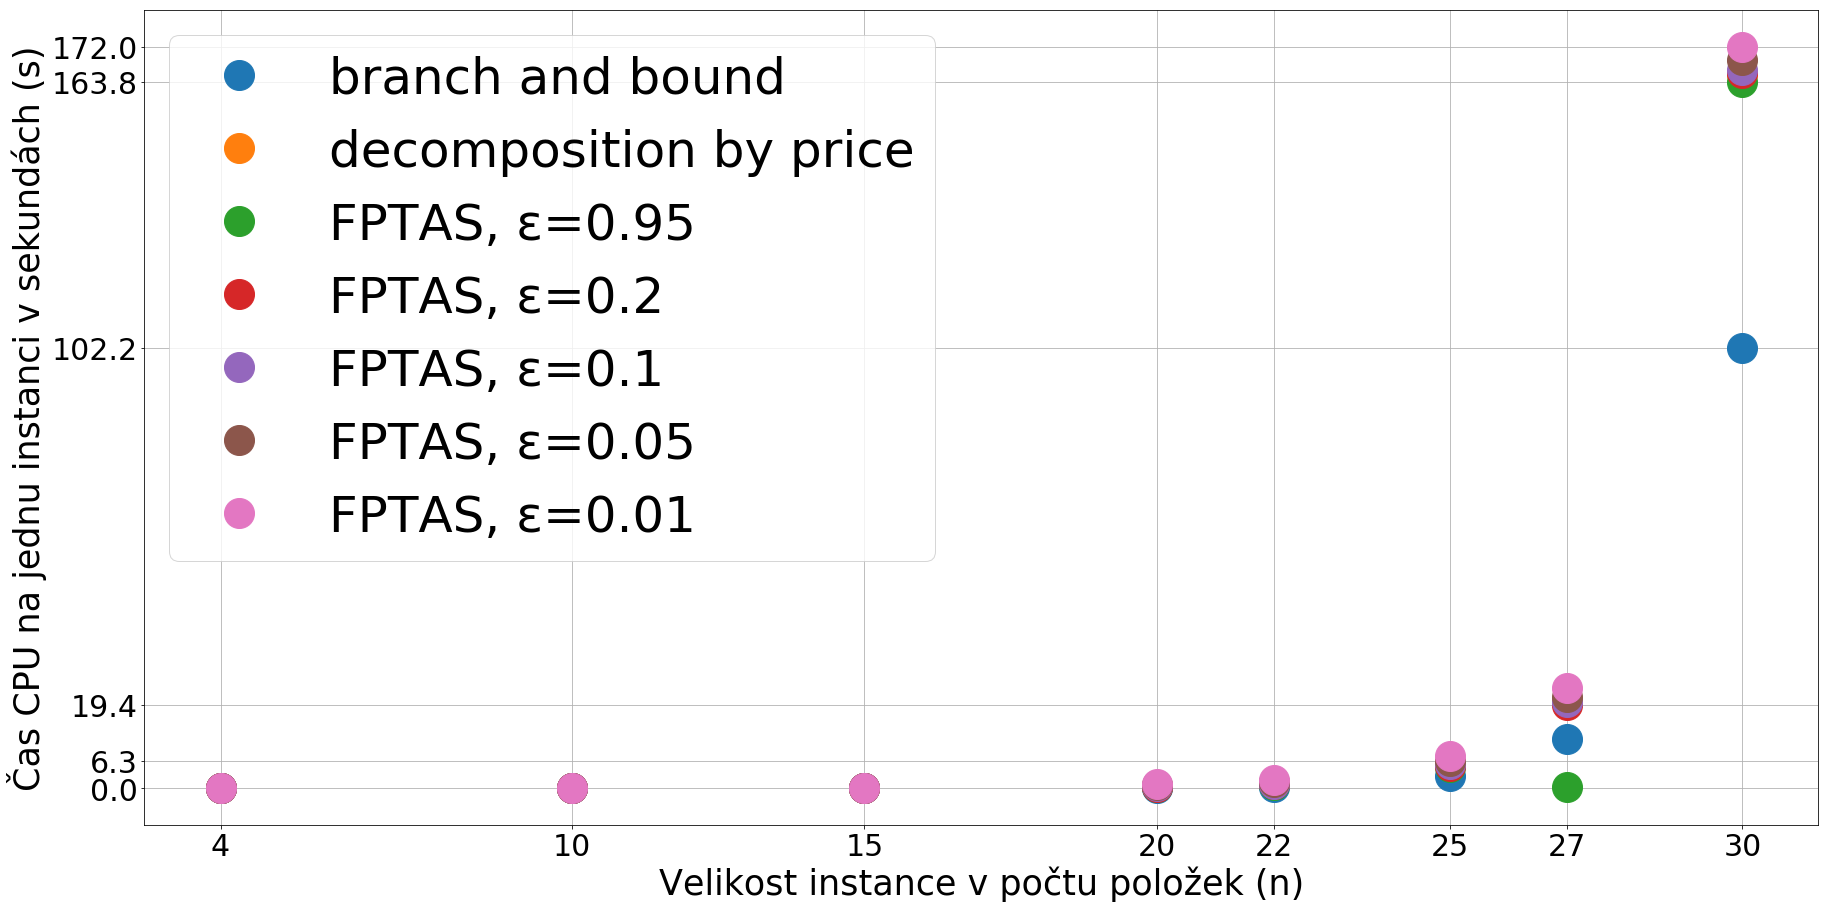

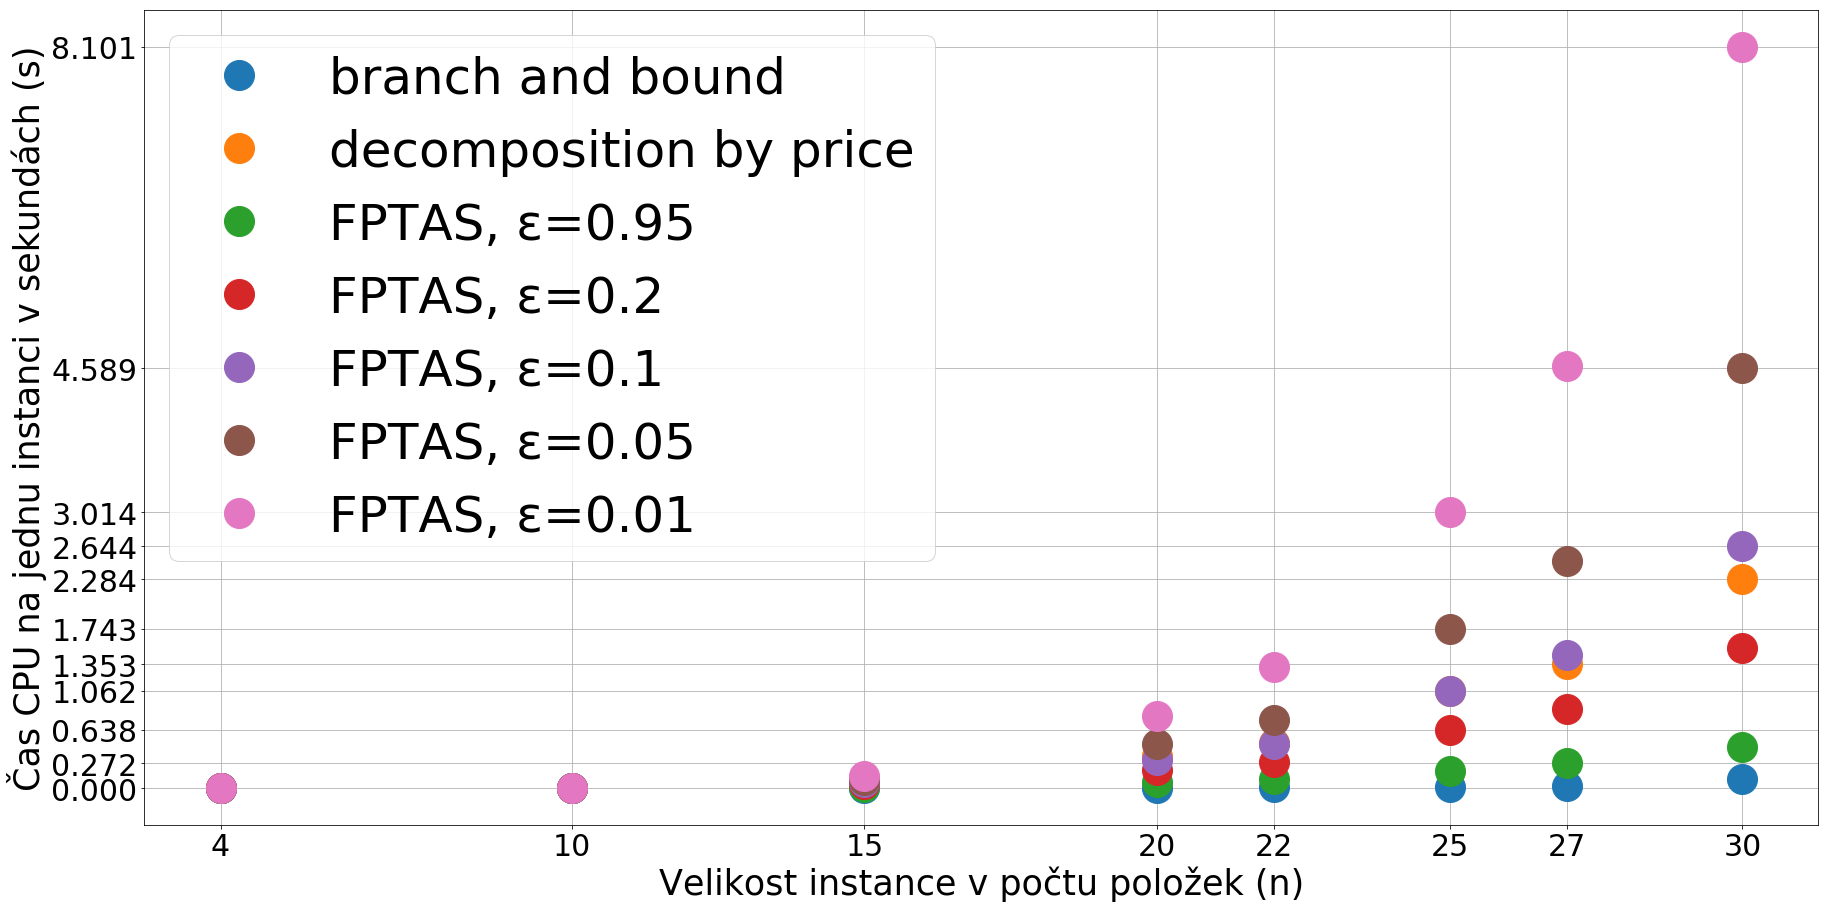

In [6]:
do_plot(30, 15, timeMean.index, timeMean[['tBB','tDC','tFPTASeps0.95','tFPTASeps0.2','tFPTASeps0.1','tFPTASeps0.05','tFPTASeps0.01' ]], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        ['branch and bound', 'decomposition by price', 'FPTAS, ε=0.95','FPTAS, ε=0.2',
        'FPTAS, ε=0.1', 'FPTAS, ε=0.05', 'FPTAS, ε=0.01'], "FPTAS1avg.pdf", 30, 1000)
do_plot(30, 15, timeMean.index, timeMedian[['tBB','tDC', 'tFPTASeps0.95','tFPTASeps0.2','tFPTASeps0.1','tFPTASeps0.05','tFPTASeps0.01' ]], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v sekundách (s)", 
        ['branch and bound','decomposition by price','FPTAS, ε=0.95','FPTAS, ε=0.2',
        'FPTAS, ε=0.1', 'FPTAS, ε=0.05', 'FPTAS, ε=0.01'], "FPTAS150.pdf", 30, 1000)

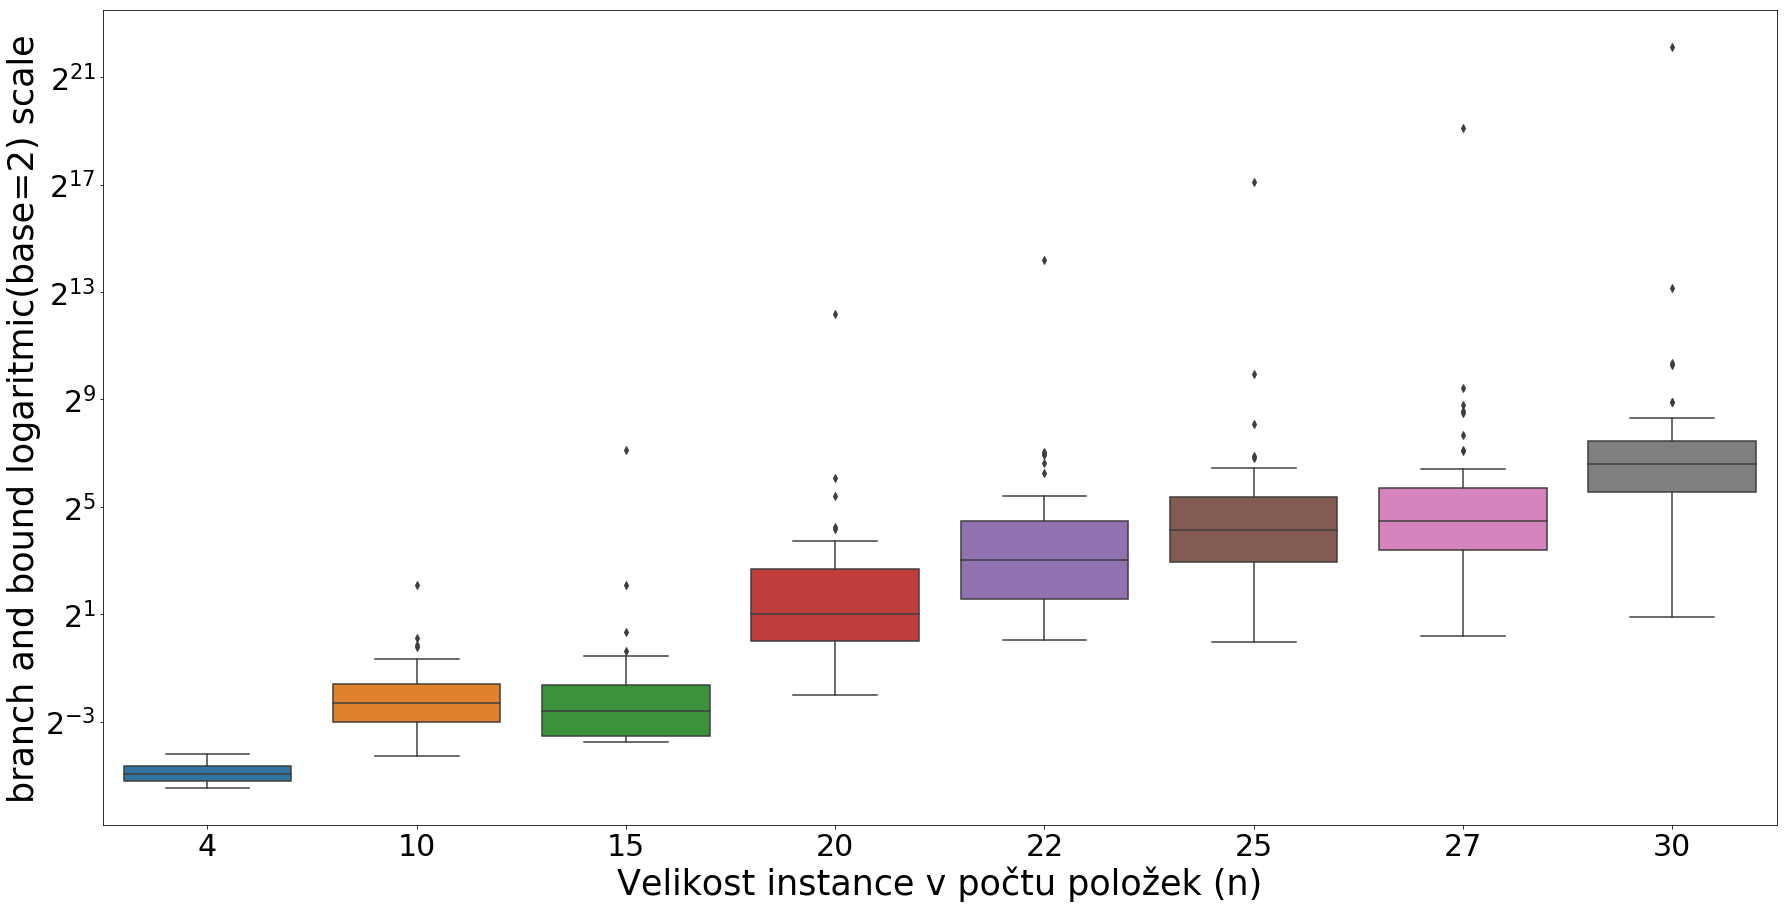

In [12]:
do_box_plot('n', 'tBB', RAW_DATA, 'Velikost instance v počtu položek (n)', 
            'branch and bound logaritmic(base=2) scale', 'boxBB.pdf')